In [214]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import glob

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# df['tag'] = df['tag'].map({'0': '0', 'S': '1', 'C': '2', 'G': '3', 'T': '4', 'B': '5','D': '6' })

In [215]:
path= '/Users/cmkerner/Documents/sailing_ml/data/ML Training Resources'
all_files = glob.glob(path + "/*.csv")

listOfNormalizedDatFrames = []
listofTags = []
track_num = len(all_files)


for i, filename in enumerate(all_files):
    dfSpecific = pd.read_csv(filename, index_col=None, header=0)
    
    #I was lazy and did not check where the NaNs where but they were being annoying so made them all 0s.
    dfSpecific.fillna(0, inplace= True)
    dfSpecific['track_id'] = filename.split('/')[-1]
    dfSpecific['track_num'] = i
    
    dfSpecificY = dfSpecific[['tag']]
    dfSpecificY = dfSpecificY['tag'].astype('category')
#     dfSpecificY = dfSpecificY['tag'].map({'0': 0, 'S': 1, 'C': 2, 'G': 3, 'T': 4, 'B':5,'D': 6 })
    listofTags.append(dfSpecificY)
    dfSpecificX = dfSpecific.drop(columns=['tag','tag_name', 'time'])
    
    #standardize data
    scaler = StandardScaler()
#     columnsBeingStandardize = ['lat', 'lon', 'sog', 'heel', 'clew_load','pitch']
    columnsBeingStandardize = ['sog', 'heel', 'clew_load','pitch']

    dfSpecificX[columnsBeingStandardize] = scaler.fit_transform(dfSpecificX[columnsBeingStandardize])
    
    listOfNormalizedDatFrames.append(dfSpecificX)

X = pd.concat(listOfNormalizedDatFrames, axis=0, ignore_index=True)
y = pd.concat(listofTags, axis=0, ignore_index=True)

In [216]:
kmeans = KMeans()
kmeans = KMeans(n_clusters=track_num, random_state=0).fit(X[['lon', 'lat']])
array = kmeans.predict(X[['lon', 'lat']])

cluster_map = pd.DataFrame()
cluster_map['data_index'] = X.index.values
cluster_map['cluster'] = kmeans.labels_

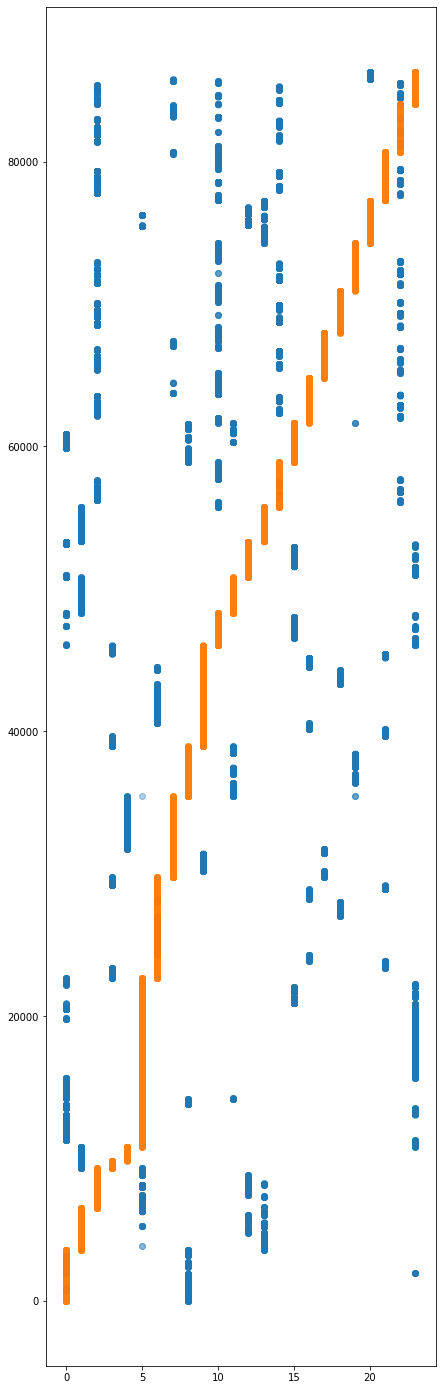

In [217]:
fig, ax = plt.subplots(figsize = (7,25))
scatter = ax.scatter(cluster_map['cluster'], cluster_map['data_index'], cmap = 'rainbow', alpha = 0.1)
scatter = ax.scatter(X['track_num'], X.index, cmap = 'rainbow', alpha = 0.1)
plt.show()

In [218]:
#ik this is janky im sorry...
X.loc[((X.lat<(-38)) & (X.lat>(-39))), 'place'] = "stingaree"
X.loc[(X.lat>32) & (X.lat<33), 'place'] = "san diego"
X.loc[(X.lat>33) & (X.lat<34), 'place'] = "long beach"
X.loc[(X.lat>34) & (X.lat<35), 'place'] = "santa barbara"
X.loc[(X.lat>54) & (X.lat<55), 'place'] = "kiel"
X.place.value_counts()

stingaree        35231
kiel             24817
long beach       14168
san diego         6423
santa barbara     5679
Name: place, dtype: int64

In [219]:
tracks_df = X.groupby("track_id").agg(
    avg_lat=pd.NamedAgg(column='lat', aggfunc='mean'),
    avg_lon=pd.NamedAgg(column='lon', aggfunc='mean'),
    place=pd.NamedAgg(column='place', aggfunc='max'),
    boat_class=pd.NamedAgg(column='boat_class', aggfunc='max'))
tracks_df

,avg_lat,avg_lon,place,boat_class
track_id,,,,
MLData104.csv,-38.098237,144.405566,stingaree,Martine
MLData106.csv,-38.129773,144.401542,stingaree,Paris
MLData109.csv,-38.129686,144.401244,stingaree,Tamra
MLData117.csv,-38.132583,144.398022,stingaree,Tamra
MLData118.csv,-38.099889,144.404065,stingaree,Martine
MLData120.csv,54.435609,10.187614,kiel,Mathias Berthet
MLData121.csv,54.436456,10.189589,kiel,Mathias Berthet
MLData122.csv,54.436481,10.191511,kiel,Mathias Berthet
MLData123.csv,54.437564,10.189714,kiel,Mathias Berthet


In [220]:
# tracks = X.groupby('track_id')
# track_info = pd.DataFrame()

# for (i, track) in tracks:
#     track_info[i] = {'boat_class' = np.all(track['boat_class']). 'place' = np.all(track['place']), 'avg_lat' = np.mean(track['lat']), np.mean(track['lon']))
# track_info

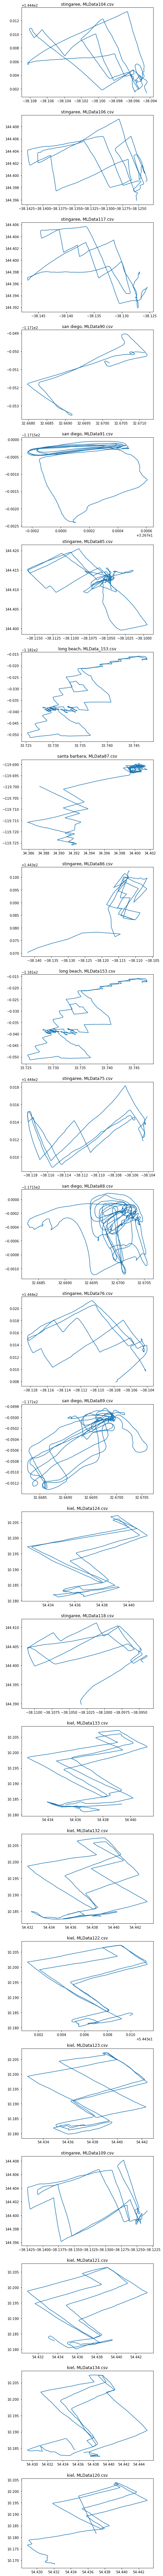

In [221]:
tracks = X.groupby('track_num')
fig, axes = plt.subplots(track_num, figsize=(7, 140))

for (num, track) in tracks:
    axes[num].plot(track.lat, track.lon)
    axes[num].set_title(f"{track['place'].any()}, {track['track_id'].any()}")